In [1]:
import sys ###kfkidnap1
sys.path.append('../scripts/')
from kf import *

In [2]:
def trial(animation): ###kfkidnap1test
    time_interval = 0.1
    world = World(30, time_interval, debug=not animation) 

    ## 地図を生成して3つランドマークを追加 ##
    m = Map()
    m.append_landmark(Landmark(-4,2))
    m.append_landmark(Landmark(2,-3))
    m.append_landmark(Landmark(3,3))
    world.append(m)

    ## ロボットを作る ##
    init_pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(-5.0, 5.0), np.random.uniform(-math.pi, math.pi)]).T
    robot_pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(-5.0, 5.0), np.random.uniform(-math.pi, math.pi)]).T
    kf = KalmanFilter(m, init_pose)
    a = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, kf)
    r = Robot(robot_pose, sensor=Camera(m), agent=a, color="red")
    world.append(r)

    world.draw()
    
    return (r.pose, a.estimator.belief.mean)

<IPython.core.display.Javascript object>


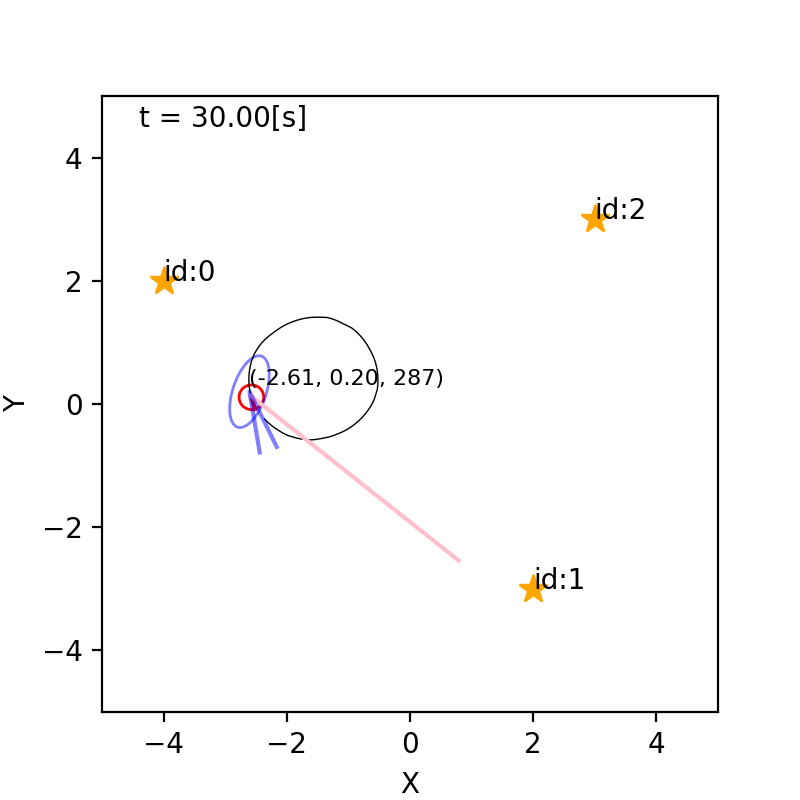

(array([-2.3631764 , -0.24238254, -0.81818756]),
 array([-1.65776849,  0.47816441, -1.43580602]))

In [3]:
trial(True)